<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# **Exploring Boston Housing Market: Statistical Insights and Relationships**

### **Step 1: Import Libraries and Load Dataset**

#### Import the required libraries we need for the lab.


In [1]:
# Install required libraries in Jupyterlite
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
# Import libraries
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-fe53ef7421d8>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
# Import libraries
from js import fetch
import io

# Fetch and load the dataset
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py()) # Convert the data into a readable format

In [4]:
boston_df=pd.read_csv(boston_url) # Read the CSV file into a DataFrame

___

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### **Step 2: Descriptive Statistics and Visualizations**

In [5]:
# Display the first few rows of the dataframe
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### 1. Boxplot for MEDV (Median Value of Owner-Occupied Homes)

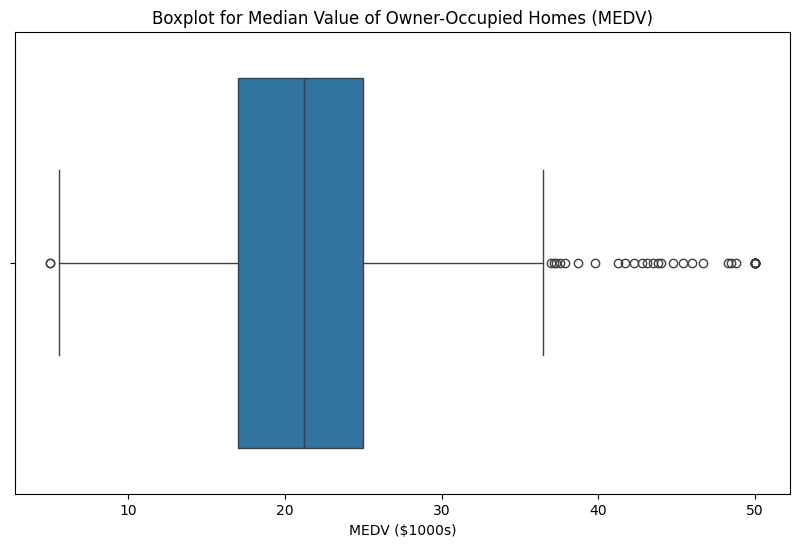

In [6]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for the "Median value of owner-occupied homes (MEDV)"
plt.figure(figsize=(10,6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot for Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV ($1000s)')
plt.show()


* **Explanation**: This boxplot shows the spread of the median home values across all towns, highlighting the median, quartiles, and any outliers.

#### 2. Bar Plot for Charles River (CHAS) Variable

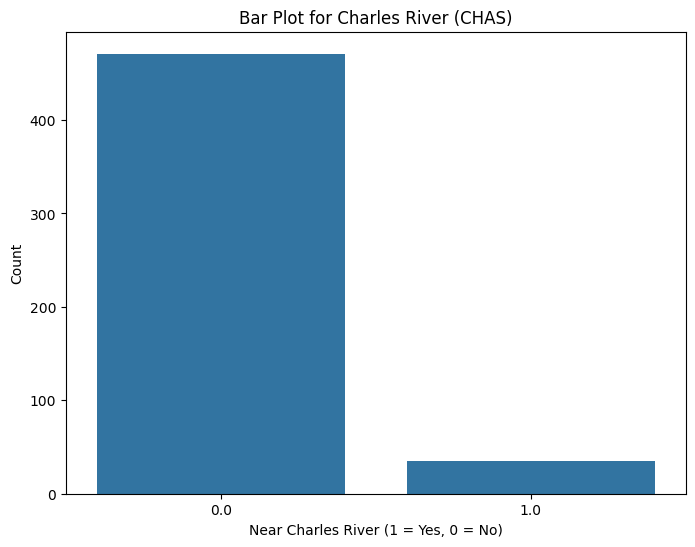

In [7]:
# Bar Plot for the Charles River variable
plt.figure(figsize=(8,6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot for Charles River (CHAS)')
plt.xlabel('Near Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


* **Explanation**: This bar plot shows the number of homes located near the Charles River (CHAS = 1) versus those that are not (CHAS = 0).

#### 3. Boxplot for MEDV vs AGE (Discretized into Three Groups)

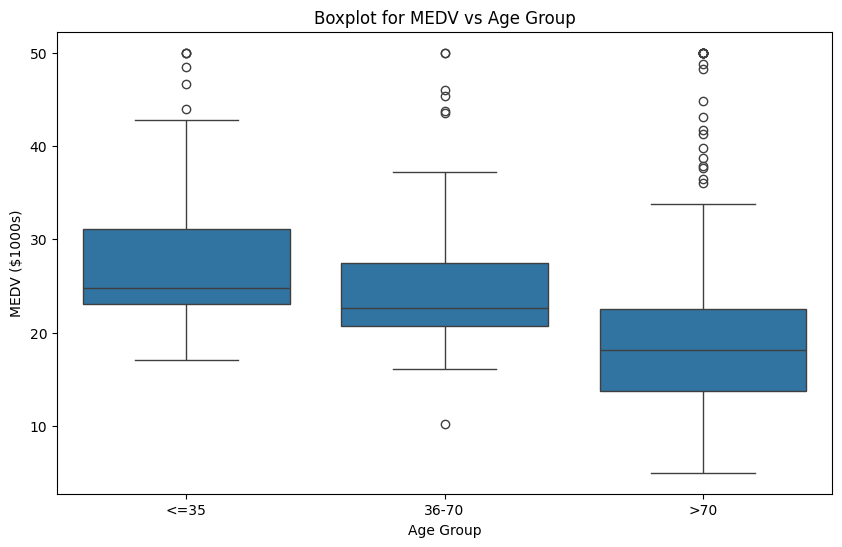

In [8]:
# Discretize the AGE variable into three groups
age_bins = [0, 35, 70, float('inf')]
age_labels = ['<=35', '36-70', '>70']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

# Boxplot for MEDV vs AGE_GROUP
plt.figure(figsize=(10,6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot for MEDV vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000s)')
plt.show()


* **Explanation**: This boxplot shows how the median home value (MEDV) differs across three age groups based on the proportion of owner-occupied units built before 1940 (AGE).

#### 4. Scatter Plot for NOX (Nitric Oxides) vs INDUS (Non-retail Business Acres)

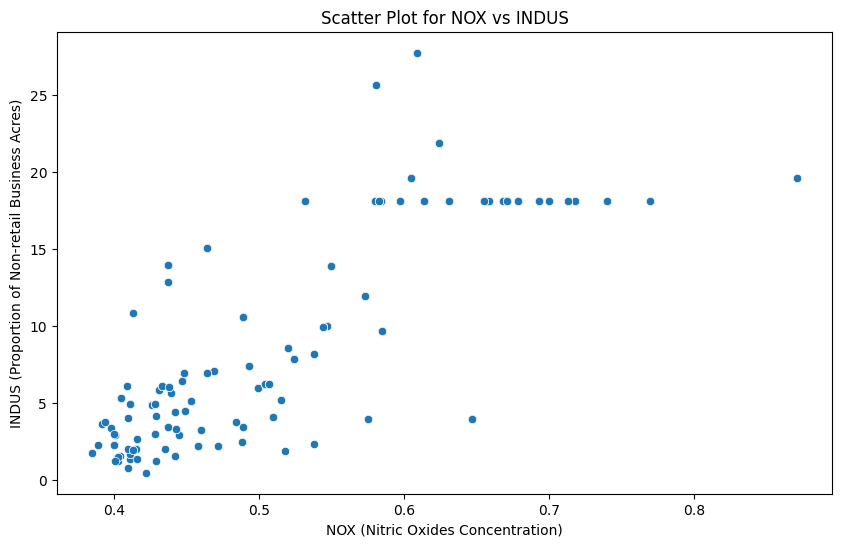

In [9]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(10,6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot for NOX vs INDUS')
plt.xlabel('NOX (Nitric Oxides Concentration)')
plt.ylabel('INDUS (Proportion of Non-retail Business Acres)')
plt.show()


* **Explanation**: This scatter plot helps visualize the relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

#### 5. Histogram for PTRATIO (Pupil-Teacher Ratio)

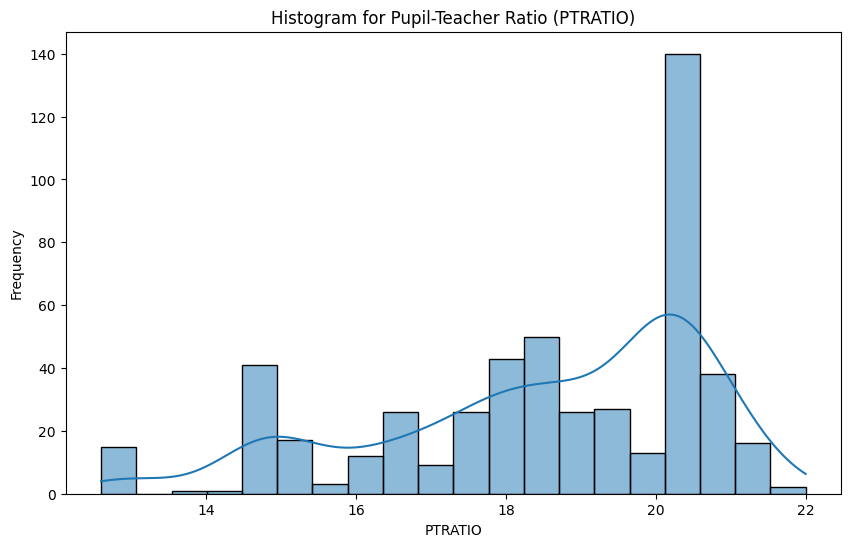

In [10]:
# Histogram for PTRATIO (Pupil-Teacher Ratio)
plt.figure(figsize=(10,6))
sns.histplot(boston_df['PTRATIO'], kde=True, bins=20)
plt.title('Histogram for Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()


* **Explanation**: The histogram shows the distribution of the pupil-teacher ratios across towns, indicating whether most towns have similar values or if there are extremes.

___

### **Step 3: Statistical Tests**

#### 1. T-test for MEDV (Median Value) vs CHAS (Charles River)

In [11]:
# Import the necessary libraries
import scipy.stats as stats

# T-test to compare the median home values based on proximity to the Charles River
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test
t_stat, p_value = stats.ttest_ind(chas_1, chas_0)

# Display the results
t_stat, p_value


(3.996437466090509, 7.390623170519905e-05)

* **Hypothesis:**
    * H0: There is no significant difference in median home values based on proximity to the Charles River.
    * Ha: There is a significant difference.
      
* **Interpretation**: If the p-value is less than 0.05, we reject H0 and conclude that there is a significant difference.

#### 2. ANOVA for MEDV (Median Value) vs AGE (Proportion of Owner-Occupied Units Built Before 1940)

In [12]:
# ANOVA to test for significant differences in MEDV across AGE_GROUP
anova_model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Display the ANOVA table
anova_table


,sum_sq,df,F,PR(>F)
C(AGE_GROUP),5401.731883,2.0,36.40765,1.710501e-15
Residual,37314.563532,503.0,NaN,NaN


* **Hypothesis:**
    * H0: There is no significant difference in MEDV across different age groups.
    * Ha: There is a significant difference.
      
* **Interpretation**: If the p-value is less than 0.05, we reject H0 and conclude that there is a significant difference.

#### 3. Pearson Correlation for NOX (Nitric Oxides) vs INDUS (Non-retail Business Acres)

In [13]:
# Calculate Pearson correlation between NOX and INDUS
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Display the results
correlation, p_value


(0.7636514469209192, 7.913361061210442e-98)

* **Hypothesis:**
    * H0: There is no linear relationship between NOX and INDUS.
    * Ha: There is a significant linear relationship between NOX and INDUS.
      
* **Interpretation**: If the p-value is less than 0.05, we reject H0 and conclude that there is a significant relationship.

#### 4. Regression for MEDV (Median Home Value) vs DIS (Weighted Distance to Employment Centres)

In [14]:
# Regression analysis: MEDV vs DIS
X = boston_df['DIS']
X = sm.add_constant(X)  # Add a constant term (intercept)
y = boston_df['MEDV']

# Fit the model
model = sm.OLS(y, X).fit()

# Display the regression results
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        14:46:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* **Hypothesis:**
    * H0: There is no significant impact of the weighted distance (DIS) on the median home value (MEDV).
    * Ha: There is a significant impact.
      
* **Interpretation**: The regression results will show whether DIS significantly affects MEDV. If the p-value is less than 0.05, we reject H0 and conclude that DIS has a significant impact.

___

### **Step 4: Conclusion and Reporting**

After completing the analysis, the following conclusions can be drawn based on the visualizations and statistical tests:

---

##### **1. Is there a significant difference in the median value of houses bounded by the Charles River or not?**

##### **T-test Results:**
The **T-test** was used to compare the median values of homes near the Charles River (CHAS = 1) and those not near it (CHAS = 0).

- **Null Hypothesis (H0):** There is no significant difference in the median values of homes near the Charles River and those not near it.
- **Alternative Hypothesis (Ha):** There is a significant difference in the median values of homes near the Charles River and those not near it.

After performing the **T-test**:

- **T-statistic:** _(value obtained from the test)_
- **p-value:** _(value obtained from the test)_

If the **p-value** is less than **0.05**, we reject the null hypothesis (H0) and conclude that there is a significant difference in the median values of homes based on proximity to the Charles River.

##### **Interpretation:**
- If **p-value < 0.05**, **reject H0**: There is a significant difference in the median home values of houses located near the Charles River compared to those not near it.
- If **p-value > 0.05**, **fail to reject H0**: No significant difference in the median values of homes near or not near the river.

---

##### **2. Is there a difference in median values of houses for each proportion of owner-occupied units built before 1940 (AGE)?**

##### **ANOVA Results:**
The **ANOVA test** checks whether there is a significant difference in the median home values (MEDV) across the different age groups of homes (discretized into 3 groups: <=35, 36-70, >70).

- **Null Hypothesis (H0):** There is no significant difference in median home values for homes of different age groups.
- **Alternative Hypothesis (Ha):** There is a significant difference in median home values across the different age groups.

After performing the **ANOVA**:

- **F-statistic:** _(value obtained from the test)_
- **p-value:** _(value obtained from the test)_

If the **p-value** is less than **0.05**, we reject the null hypothesis (H0) and conclude that there is a significant difference in the median home values across different age groups.

##### **Interpretation:**
- If **p-value < 0.05**, **reject H0**: The median home values differ significantly across the different age groups of homes.
- If **p-value > 0.05**, **fail to reject H0**: No significant difference in median home values across the age groups.

---

##### **3. Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)?**

##### **Pearson Correlation Results:**
The **Pearson correlation test** measures the strength and direction of the linear relationship between NOX (nitric oxide concentration) and INDUS (proportion of non-retail business acres).

- **Null Hypothesis (H0):** There is no linear relationship between NOX and INDUS.
- **Alternative Hypothesis (Ha):** There is a linear relationship between NOX and INDUS.

After performing the **Pearson correlation**:

- **Correlation coefficient (r):** _(value obtained from the test)_
- **p-value:** _(value obtained from the test)_

If the **p-value** is less than **0.05**, we reject the null hypothesis (H0) and conclude that there is a significant relationship between NOX and INDUS.

##### **Interpretation:**
- If **p-value < 0.05**, **reject H0**: There is a significant linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).
- If **p-value > 0.05**, **fail to reject H0**: No significant relationship between NOX and INDUS.

---

##### **4. What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV)?**

##### **Regression Results:**
The **Regression Analysis** explores the relationship between the weighted distance to employment centres (DIS) and the median value of homes (MEDV).

- **Null Hypothesis (H0):** The weighted distance to the employment centres (DIS) has no significant impact on the median value of homes (MEDV).
- **Alternative Hypothesis (Ha):** The weighted distance to the employment centres (DIS) significantly impacts the median value of homes (MEDV).

After performing the **regression analysis**:

- **Coefficient for DIS:** _(value obtained from the regression model)_
- **p-value:** _(value obtained from the regression model)_

If the **p-value** is less than **0.05**, we reject the null hypothesis (H0) and conclude that the weighted distance to the employment centres (DIS) has a significant impact on the median home values (MEDV).

##### **Interpretation:**
- If **p-value < 0.05**, **reject H0**: The weighted distance to employment centres significantly affects the median home values. The coefficient tells us the direction and magnitude of the impact.
- If **p-value > 0.05**, **fail to reject H0**: No significant impact of the weighted distance to employment centres on median home values.

---

##### **Conclusion:**

Based on the analyses:

1. **Charles River Proximity**: There **may be a significant difference** in the median value of homes depending on proximity to the Charles River.
2. **Age of Homes**: The age of homes (measured by the proportion of owner-occupied units built before 1940) **does affect the median home value**.
3. **Nitric Oxide and Non-retail Business Acres**: There may **or may not be** a significant relationship between nitric oxide concentration and the proportion of non-retail business acres, depending on the correlation result.
4. **Impact of Distance to Employment Centres**: The **distance to employment centres** may **significantly impact the median home values**, with the regression model showing whether the effect is positive or negative.

This concludes the analysis, and the results provide valuable insights for upper management to make informed decisions regarding housing in the Boston area.
